(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

In [6]:
import cv2 as cv
import numpy as np

# converting from BGR to Lab color space
original_img = cv.imread('media\\highlights_and_shadows.jpg')

Lab_img = cv.cvtColor(original_img, cv.COLOR_BGR2Lab)

# splitting the Lab image to different channels
L, a, b = cv.split(Lab_img)

gamma = 4
L_normalized = L / 255.0

g = np.power(L_normalized, gamma) * 255.0
g = g.astype(np.uint8)

# merge separated channels back to Lab image
Lab_img_corrected = cv.merge((g, a, b))
# converting back to BGR color space
result_img = cv.cvtColor(Lab_img_corrected, cv.COLOR_Lab2BGR)

cv.imshow('Original Image', original_img)
cv.imshow('Corrected Image (Gamma=' + str(gamma) + ')', result_img)
    
cv.waitKey(0)
cv.destroyAllWindows()

(b) Show the histograms of the original and corrected images.

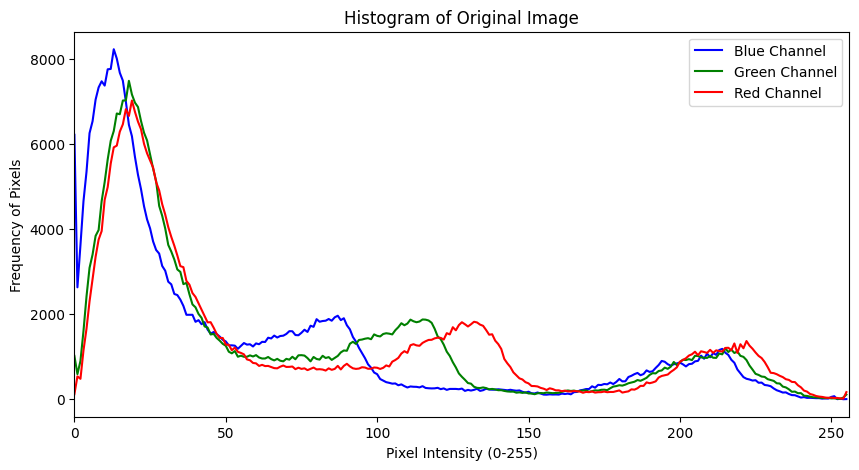

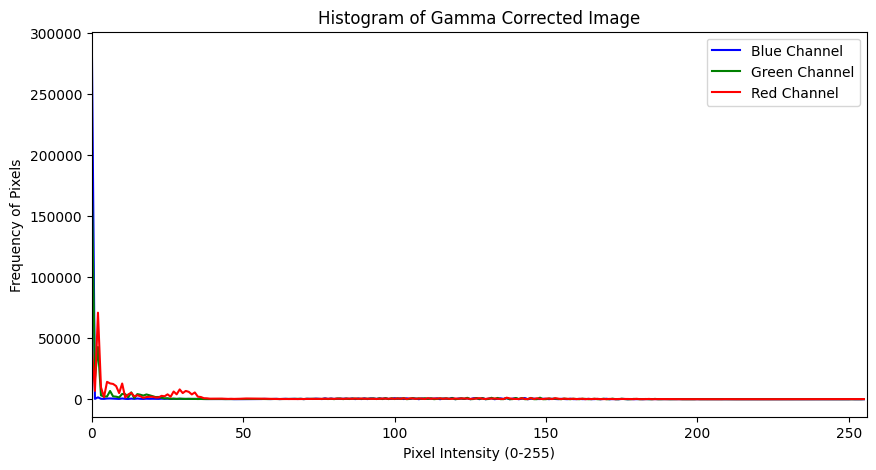

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Histogram for Original Image ---
plt.figure(figsize=(10, 5)) # Optional: Makes the graph larger
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency of Pixels")

color = ('b', 'g', 'r')
labels = ('Blue Channel', 'Green Channel', 'Red Channel') # Labels for the legend

for i, c in enumerate(color):
    hist = cv.calcHist([original_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c, label=labels[i]) 

plt.xlim([0, 256])
plt.legend() # This displays the label box
plt.show()

# --- 2. Histogram for Gamma Corrected Image ---
plt.figure(figsize=(10, 5)) # Optional: Makes the graph larger
plt.title("Histogram of Gamma Corrected Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency of Pixels")

for i, c in enumerate(color):
    hist = cv.calcHist([result_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c, label=labels[i])

plt.xlim([0, 256])
plt.legend()
plt.show()

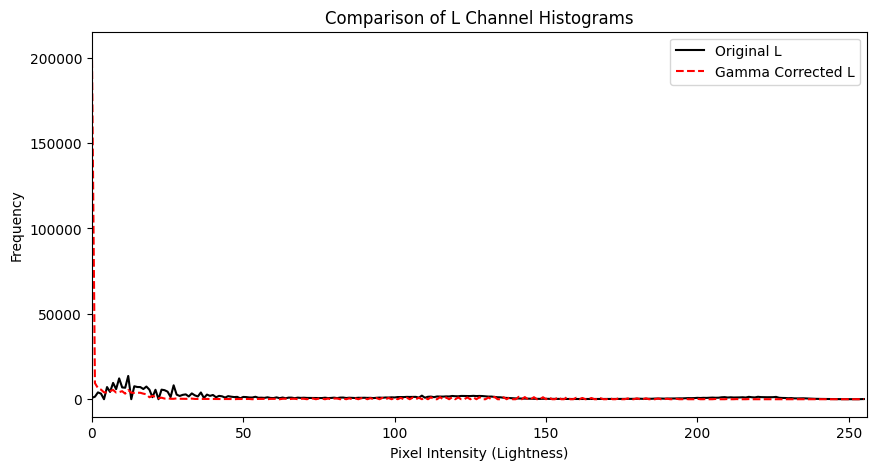

In [8]:
import matplotlib.pyplot as plt

# Assuming you have 'L' (original) and 'g' (gamma corrected L) from your previous code

# 1. Calculate Histogram for Original L
hist_original = cv.calcHist([L], [0], None, [256], [0, 256])

# 2. Calculate Histogram for Corrected L (g)
hist_corrected = cv.calcHist([g], [0], None, [256], [0, 256])

# 3. Plot them together
plt.figure(figsize=(10,5))
plt.title("Comparison of L Channel Histograms")
plt.xlabel("Pixel Intensity (Lightness)")
plt.ylabel("Frequency")

plt.plot(hist_original, color='black', label='Original L')
plt.plot(hist_corrected, color='red', linestyle='dashed', label='Gamma Corrected L')

plt.xlim([0, 256])
plt.legend()
plt.show()